# Uploading file to Colab

In [1]:
from google.colab import files
uploaded = files.upload()  # choose your CSV file

Saving Fraud.csv to Fraud (1).csv


# importing the dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# importing the CSV file

In [7]:
data = pd.read_csv('Fraud (1).csv')

## checking shape of Data

In [8]:
data.shape

(6362620, 11)

In [9]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Checking for the null values in the data

In [11]:

data.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


## checking the data distribution weather it is a balanced or unbalanced data

In [12]:

data.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


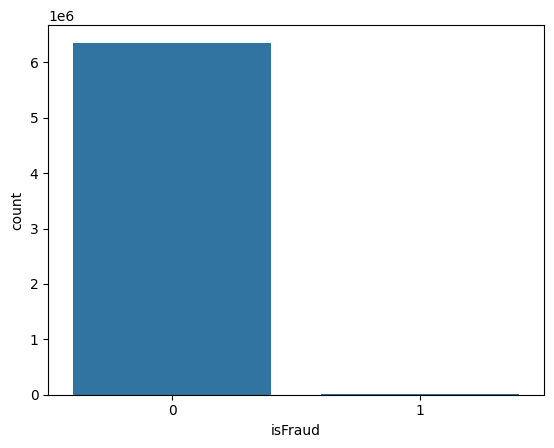

In [13]:
sns.countplot(data=data, x='isFraud')
plt.show()

# checking for the outliers in the data

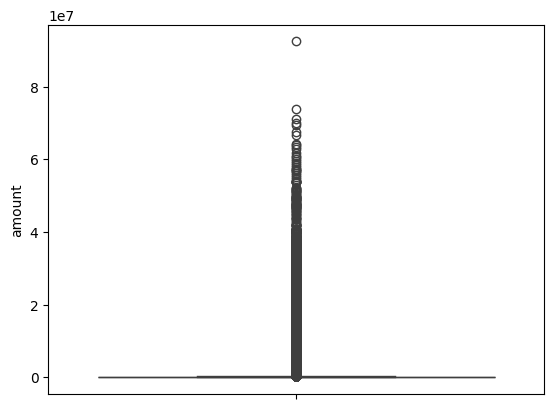

In [14]:
sns.boxplot(data=data.amount)
plt.show()

# Removing the outliers

In [15]:
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)

In [16]:
IQR = Q3 - Q1
data = data[(data['amount'] >= (Q1 - 1.5 * IQR)) & (data['amount'] <= (Q3 + 1.5 * IQR))]

In [17]:
data.shape

(6024542, 11)

# checking the class distribution of isFraud again

In [18]:
data.isFraud.value_counts()

,count
isFraud,
0,6020183
1,4359


# Frauds cases reduce to almost half that were earlier 8213 So, we can't removing the outliers directly cause here more fraction of the ouliers are from the Fraud category got removed which important for the training data , So we remove the outliers Based on class separately not Directly on the whole dataset

In [19]:
data = pd.read_csv('Fraud (1).csv')

In [20]:
def remove_outliers_iqr(data, features):
    cleaned_data = data.copy()
    for col in features:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    return cleaned_data

# Split fraud and non-fraud data
fraud_data = data[data['isFraud'] == 1]
nonfraud_data = data[data['isFraud'] == 0]

In [21]:
print(f'Fraud data shape: {fraud_data.shape}')
print(f'Non-fraud data shape: {nonfraud_data.shape}')

Fraud data shape: (8213, 11)
Non-fraud data shape: (6354407, 11)


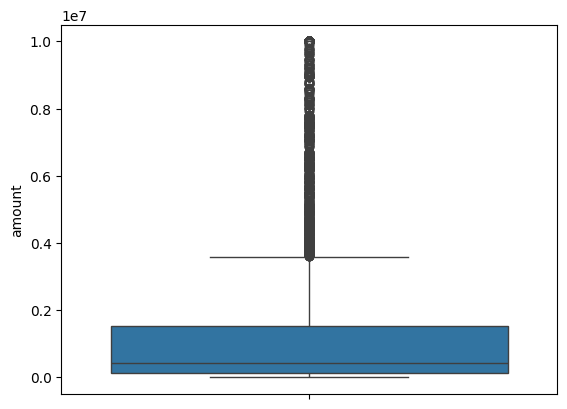

In [22]:
sns.boxplot(data=fraud_data.amount)
plt.show()

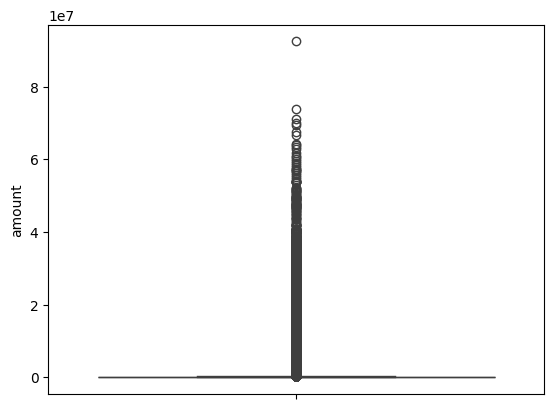

In [23]:
sns.boxplot(data=nonfraud_data.amount)
plt.show()

In [24]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [25]:
num_features = ['amount']

fraud_cleaned = fraud_data.copy()
nonfraud_cleaned = remove_outliers_iqr(nonfraud_data, num_features)

In [26]:
print(f'Fraud data shape after cleaning: {fraud_cleaned.shape}')
print(f'Non-fraud data shape after cleaning: {nonfraud_cleaned.shape}')

Fraud data shape after cleaning: (8213, 11)
Non-fraud data shape after cleaning: (6019060, 11)


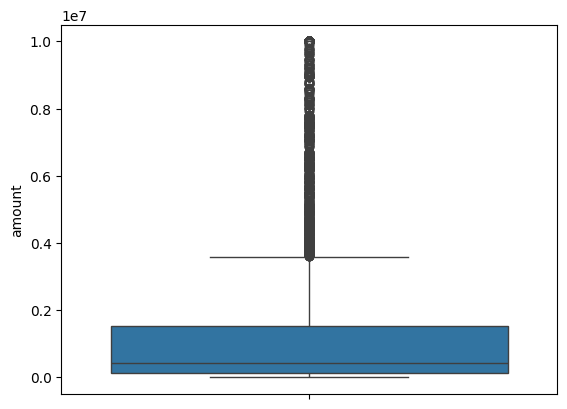

In [27]:
sns.boxplot(data=fraud_cleaned.amount)
plt.show()

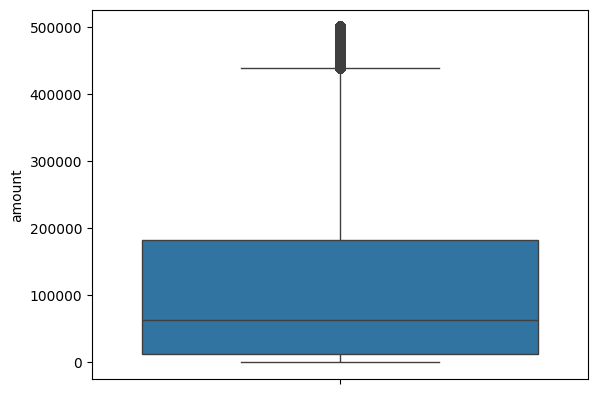

In [28]:
sns.boxplot(data=nonfraud_cleaned.amount)
plt.show()

In [29]:
data_cleaned = pd.concat([fraud_cleaned, nonfraud_cleaned], axis=0)

In [30]:
data_cleaned = data_cleaned.sample(frac=1, random_state=42).reset_index(drop=True)

In [31]:
data_cleaned.shape

(6027273, 11)

In [32]:
data_cleaned.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,163,CASH_OUT,106810.48,C1879671496,0.00,0.00,C1637991362,693919.60,800730.09,0,0
1,282,CASH_OUT,36134.24,C1060756180,59497.66,23363.42,C1829711250,1609789.84,1690752.84,0,0
2,305,PAYMENT,30548.81,C1687387115,496.00,0.00,M728263464,0.00,0.00,0,0
3,261,PAYMENT,31957.97,C2031400510,0.00,0.00,M203210961,0.00,0.00,0,0
4,143,PAYMENT,6122.25,C1393244007,31282.00,25159.75,M191798552,0.00,0.00,0,0


In [33]:
data_cleaned.type.value_counts()

,count
type,
CASH_OUT,2186668
PAYMENT,2151495
CASH_IN,1373574
TRANSFER,274106
DEBIT,41430


In [34]:
data_cleaned.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Removing the name columns because of no use 'nameOrig' and 'nameDest'

In [35]:
data_cleaned.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1, inplace=True)

In [36]:
data_cleaned.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,163,CASH_OUT,106810.48,0.00,0.00,693919.60,800730.09,0
1,282,CASH_OUT,36134.24,59497.66,23363.42,1609789.84,1690752.84,0
2,305,PAYMENT,30548.81,496.00,0.00,0.00,0.00,0
3,261,PAYMENT,31957.97,0.00,0.00,0.00,0.00,0
4,143,PAYMENT,6122.25,31282.00,25159.75,0.00,0.00,0


# Now encoding of the type of transation using ontHotencoding becasue type column has nominal data

In [37]:
from sklearn.preprocessing import OneHotEncoder

df = data_cleaned.copy()

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['type']])
ohe_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['type']))

In [38]:
df_encoded = pd.concat([df.drop(columns=['type']).reset_index(drop=True),
                        ohe_df.reset_index(drop=True)], axis=1)

In [39]:
df_encoded.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,163,106810.48,0.00,0.00,693919.60,800730.09,0,0.0,1.0,0.0,0.0,0.0
1,282,36134.24,59497.66,23363.42,1609789.84,1690752.84,0,0.0,1.0,0.0,0.0,0.0
2,305,30548.81,496.00,0.00,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
3,261,31957.97,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
4,143,6122.25,31282.00,25159.75,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0


In [40]:
df_encoded.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

# Input Featurs Now for the model
'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
'newbalanceDest',isFlaggedFraud', 'type_CASH_IN',
'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'

In [41]:
X = df_encoded[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']]
y = df_encoded['isFraud']

In [42]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,163,106810.48,0.00,0.00,693919.60,800730.09,0.0,1.0,0.0,0.0,0.0
1,282,36134.24,59497.66,23363.42,1609789.84,1690752.84,0.0,1.0,0.0,0.0,0.0
2,305,30548.81,496.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0
3,261,31957.97,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0
4,143,6122.25,31282.00,25159.75,0.00,0.00,0.0,0.0,0.0,1.0,0.0


In [43]:
y.head()

,isFraud
0,0
1,0
2,0
3,0
4,0


In [44]:
y.value_counts()

,count
isFraud,
0,6019060
1,8213


# Target Variable is
'isFraud'

In [45]:
from sklearn.model_selection import train_test_split

# X = features, y = target column
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Using the stratify technique both the class have equal proportion in training and testing dataset

In [46]:
y_test.value_counts()

,count
isFraud,
0,1203812
1,1643


In [47]:
y_train.value_counts()

,count
isFraud,
0,4815248
1,6570


# Model training without SMOTE

In [48]:
!pip install xgboost
!pip install lightgbm

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score , accuracy_score

# Using Decision tree

In [50]:
Dicision_tree = DecisionTreeClassifier(random_state=42)
Dicision_tree.fit(X_train, y_train)
y_pred = Dicision_tree.predict(X_test)

Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

cm_dt = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_dt)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9997171192620214
Confusion Matrix:
 [[1203661     151]
 [    190    1453]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1203812
           1       0.91      0.88      0.89      1643

    accuracy                           1.00   1205455
   macro avg       0.95      0.94      0.95   1205455
weighted avg       1.00      1.00      1.00   1205455



# Logistic Regression

In [51]:
logistic = LogisticRegression(random_state=42, max_iter=1000)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

cm_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9993272249897341
Confusion Matrix:
 [[1203787      25]
 [    786     857]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1203812
           1       0.97      0.52      0.68      1643

    accuracy                           1.00   1205455
   macro avg       0.99      0.76      0.84   1205455
weighted avg       1.00      1.00      1.00   1205455



# Using XGboost classifier

In [52]:
classifire = XGBClassifier(random_state=42)
classifire.fit(X_train, y_train)
y_pred = classifire.predict(X_test)

Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

cm_xgb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_xgb)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9996399699698454
Confusion Matrix:
 [[1203678     134]
 [    300    1343]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1203812
           1       0.91      0.82      0.86      1643

    accuracy                           1.00   1205455
   macro avg       0.95      0.91      0.93   1205455
weighted avg       1.00      1.00      1.00   1205455



# Using LIGHT BGM

In [53]:
lgbm = lgb.LGBMClassifier(
    n_estimators=500,          # number of trees
    learning_rate=0.05,        # step size
    num_leaves=64,             # controls complexity
    class_weight="balanced",   # handles imbalance
    random_state=42,
    n_jobs=-1                  # use all CPU cores
)

# Train
lgbm.fit(X_train, y_train)

# Predictions
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

[LightGBM] [Info] Number of positive: 6570, number of negative: 4815248
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.655297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1540
[LightGBM] [Info] Number of data points in the train set: 4821818, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1203812
           1       0.66      0.98      0.79      1643

    accuracy                           1.00   1205455
   macro avg       0.83      0.99      0.89   1205455
weighted avg       1.00      1.00      1.00   1205455

ROC-AUC Score: 0.9996987647956119


In [63]:
print(confusion_matrix(y_test, y_pred))

[[1203678     134]
 [    300    1343]]


# With SMOTE

# Decision Tree

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [55]:
Dicision_tree = DecisionTreeClassifier(random_state=42)
Dicision_tree.fit(X_train_res, y_train_res)
y_pred = Dicision_tree.predict(X_test)

Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

cm_dt = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_dt)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9994856713854935
Confusion Matrix:
 [[1203260     552]
 [     68    1575]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1203812
           1       0.74      0.96      0.84      1643

    accuracy                           1.00   1205455
   macro avg       0.87      0.98      0.92   1205455
weighted avg       1.00      1.00      1.00   1205455



# Logistic Regression

In [57]:
logistic = LogisticRegression(random_state=42, max_iter=1000)
logistic.fit(X_train_res, y_train_res)
y_pred = logistic.predict(X_test)

Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

cm_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9599354600545023
Confusion Matrix:
 [[1155632   48180]
 [    116    1527]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98   1203812
           1       0.03      0.93      0.06      1643

    accuracy                           0.96   1205455
   macro avg       0.52      0.94      0.52   1205455
weighted avg       1.00      0.96      0.98   1205455



# XGBoost

In [59]:
classifire = XGBClassifier(random_state=42)
classifire.fit(X_train_res, y_train_res)
y_pred = classifire.predict(X_test)

Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

cm_xgb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_xgb)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9979045256770265
Confusion Matrix:
 [[1201297    2515]
 [     11    1632]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1203812
           1       0.39      0.99      0.56      1643

    accuracy                           1.00   1205455
   macro avg       0.70      1.00      0.78   1205455
weighted avg       1.00      1.00      1.00   1205455



# light bgm

In [60]:
lgbm = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    class_weight='balanced',
    random_state=42
)

lgbm.fit(X_train_res, y_train_res)

# Predictions
y_pred = lgbm.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Number of positive: 4815248, number of negative: 4815248
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.424177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2046
[LightGBM] [Info] Number of data points in the train set: 9630496, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1203812
           1       0.38      0.99      0.55      1643

    accuracy                           1.00   1205455
   macro avg       0.69      1.00      0.78   1205455
weighted avg       1.00      1.00      1.00   1205455

Confusion Matrix:
 [[1201194    2618]
 [      9    1634]]
